### OLS Task01
#### 쇼핑 고객 데이터

- Customer ID: 고객 아이디
- Gender: 고객의 성별
- Age: 고객의 나이
- Annual Income: 고객의 연소득
- Spending Score: 고객 행동 및 지출 성격에 따라 상점에서 할당한 점수
- Profession: 직업, 전문직
- Work Experience: 고객의 근무 경력(연 단위)
- Family Size: 가족 구성원 수

In [54]:
import pandas as pd

c_df = pd.read_csv('./datasets/customers.csv')
c_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [55]:
c_df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [56]:
c_df.Profession.value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

In [57]:
c_df = c_df[~(c_df['Profession'].isna())]
c_df.reset_index(drop=True, inplace=True)
print(c_df.isna().sum())
c_df

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1960,1996,Female,71,184387,40,Artist,8,7
1961,1997,Female,91,73158,32,Doctor,7,7
1962,1998,Male,87,90961,14,Healthcare,9,2
1963,1999,Male,77,182109,4,Executive,7,2


In [58]:
c_df.duplicated().sum()

0

In [59]:
c_df.Gender.value_counts()

Gender
Female    1166
Male       799
Name: count, dtype: int64

In [60]:
c_df['Work Experience'].value_counts()

Work Experience
1     466
0     424
8     164
9     157
4     121
7     120
6     119
5     112
10     83
2      61
3      53
12     16
13     16
14     16
15     14
11     13
16      5
17      5
Name: count, dtype: int64

In [61]:
c_df['Family Size'].value_counts()

Family Size
2    359
3    308
1    294
4    281
5    252
6    240
7    226
8      4
9      1
Name: count, dtype: int64

In [62]:
c_df = c_df.drop(labels=['CustomerID'], axis=1)
c_df

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1960,Female,71,184387,40,Artist,8,7
1961,Female,91,73158,32,Doctor,7,7
1962,Male,87,90961,14,Healthcare,9,2
1963,Male,77,182109,4,Executive,7,2


In [63]:
pre_c_df = c_df.drop(labels=['Gender', 'Profession'], axis=1)
pre_c_df

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,19,15000,39,1,4
1,21,35000,81,3,3
2,20,86000,6,1,1
3,23,59000,77,0,2
4,31,38000,40,2,6
...,...,...,...,...,...
1960,71,184387,40,8,7
1961,91,73158,32,7,7
1962,87,90961,14,9,2
1963,77,182109,4,7,2


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>,
        <Axes: title={'center': 'Work Experience'}>],
       [<Axes: title={'center': 'Family Size'}>, <Axes: >]], dtype=object)

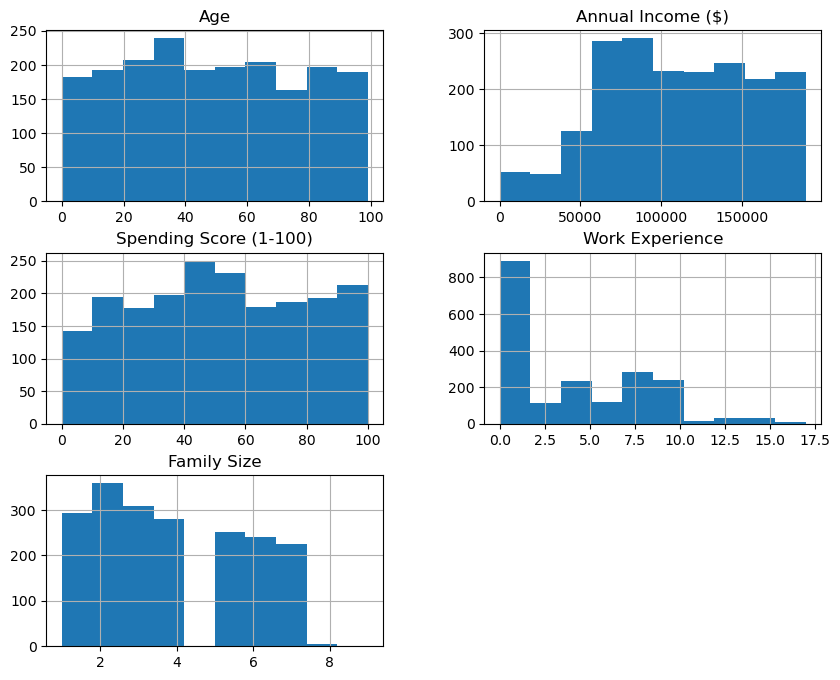

In [64]:
pre_c_df.hist(figsize=(10, 8))

In [65]:
pre_c_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

Annual Income ($)    0.026716
Family Size          0.005859
Work Experience     -0.025587
Age                 -0.037387
Name: Spending Score (1-100), dtype: float64

<Axes: >

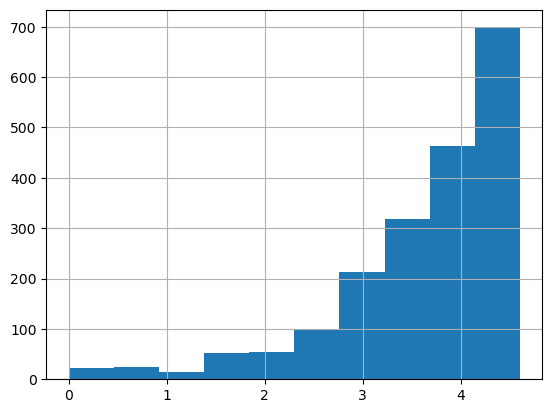

In [66]:
import numpy as np

np.log1p(pre_c_df['Age']).hist()

<Axes: >

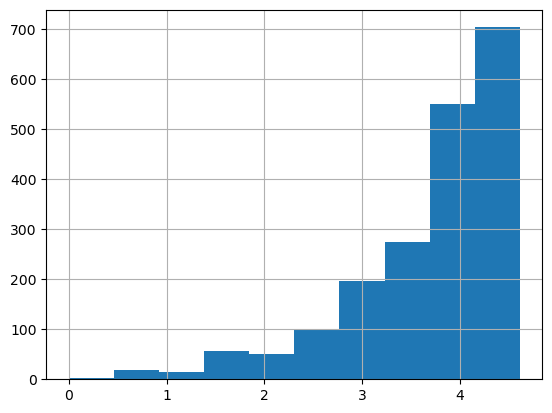

In [67]:
np.log1p(pre_c_df['Spending Score (1-100)']).hist()

In [68]:
pre_c_df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
49    34
42    32
55    31
17    30
59    27
      ..
6     12
33    12
64    11
72    10
0      2
Name: count, Length: 101, dtype: int64

<Axes: >

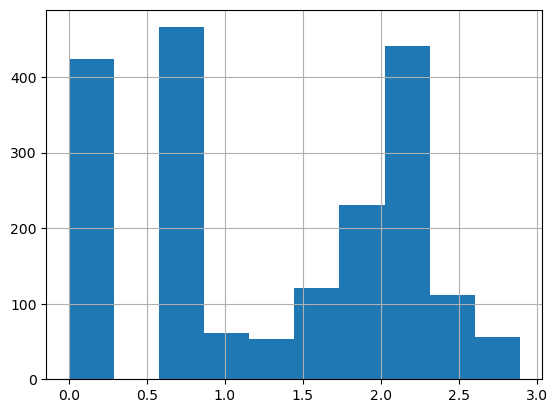

In [69]:
np.log1p(pre_c_df['Work Experience']).hist()

In [70]:
target = pre_c_df['Spending Score (1-100)']
pre_c_df['target'] = target
pre_c_df = pre_c_df.drop(labels=['Spending Score (1-100)'], axis=1)
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,target
0,19,15000,1,4,39
1,21,35000,3,3,81
2,20,86000,1,1,6
3,23,59000,0,2,77
4,31,38000,2,6,40
...,...,...,...,...,...
1960,71,184387,8,7,40
1961,91,73158,7,7,32
1962,87,90961,9,2,14
1963,77,182109,7,2,4


In [71]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              1200.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:29:09   Log-Likelihood:                         -9558.9
No. Observations:                1965   AIC:                                  1.913e+04
Df Residuals:                    1961   BIC:                                  1.915e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [72]:
# pre_c_df2 = pre_c_df.copy()
# pre_c_df2.target = np.log1p(pre_c_df2.target)

# features, targets = pre_c_df2.iloc[:, :-1], pre_c_df2.iloc[:, -1]

# model = OLS(targets, features)
# print(model.fit().summary())

In [73]:
# pre_c_df = pre_c_df2
# pre_c_df

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [75]:
get_vif(features)

,vif_score,feature
0,3.158919,Age
1,4.519000,Annual Income ($)
2,1.984835,Work Experience
3,3.733422,Family Size


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

model = OLS(y_train, X_train)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.713
Method:                 Least Squares   F-statistic:                              979.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:29:09   Log-Likelihood:                         -7651.6
No. Observations:                1572   AIC:                                  1.531e+04
Df Residuals:                    1568   BIC:                                  1.533e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [77]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [78]:
from sklearn.linear_model import LinearRegression

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [79]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 786.5728, RMSE: 28.0459, MSLE: 0.8241, RMSLE: 0.9078, R2: -0.0110


In [80]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

ptf = PowerTransformer(standardize=True)
result = ptf.fit_transform(pre_c_df[['target']])
pre_c_df['Target_yeo'] = result
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,target,Target_yeo
0,19,15000,1,4,39,-0.351822
1,21,35000,3,3,81,1.041874
2,20,86000,1,1,6,-1.763063
3,23,59000,0,2,77,0.918288
4,31,38000,2,6,40,-0.315424
...,...,...,...,...,...,...
1960,71,184387,8,7,40,-0.315424
1961,91,73158,7,7,32,-0.613184
1962,87,90961,9,2,14,-1.361787
1963,77,182109,7,2,4,-1.878507


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'Target_yeo'}>]], dtype=object)

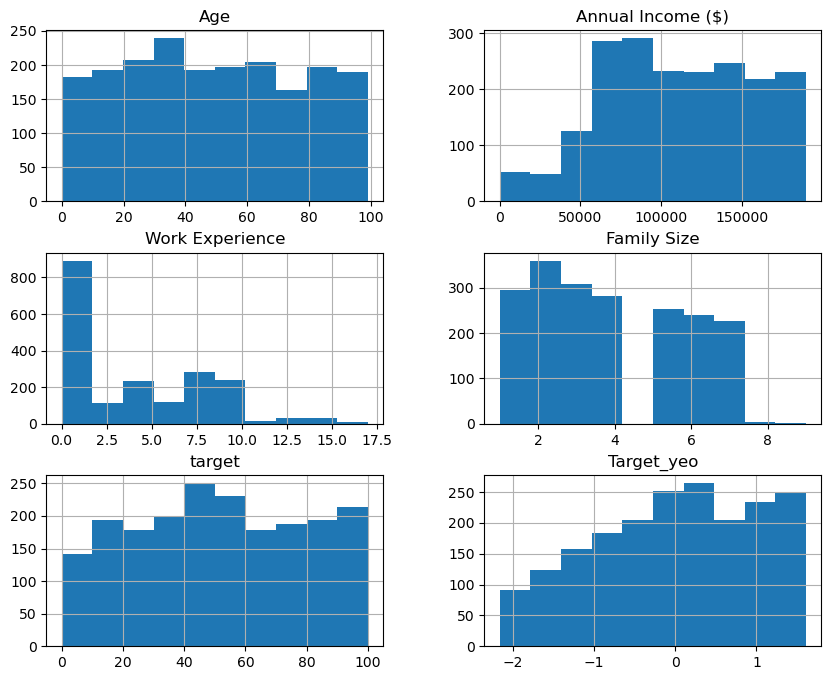

In [81]:
pre_c_df.hist(figsize=(10, 8))

In [82]:
pre_c_df = pre_c_df.drop(labels=['target'], axis=1)
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Target_yeo
0,19,15000,1,4,-0.351822
1,21,35000,3,3,1.041874
2,20,86000,1,1,-1.763063
3,23,59000,0,2,0.918288
4,31,38000,2,6,-0.315424
...,...,...,...,...,...
1960,71,184387,8,7,-0.315424
1961,91,73158,7,7,-0.613184
1962,87,90961,9,2,-1.361787
1963,77,182109,7,2,-1.878507


In [84]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.399
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                       0.232
Time:                        09:31:45   Log-Likelihood:                         -2785.4
No. Observations:                1965   AIC:                                      5579.
Df Residuals:                    1961   BIC:                                      5601.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [85]:
pre_c_df = pre_c_df.drop(labels=['Work Experience'], axis=1)
pre_c_df

,Age,Annual Income ($),Family Size,Target_yeo
0,19,15000,4,-0.351822
1,21,35000,3,1.041874
2,20,86000,1,-1.763063
3,23,59000,2,0.918288
4,31,38000,6,-0.315424
...,...,...,...,...
1960,71,184387,7,-0.315424
1961,91,73158,7,-0.613184
1962,87,90961,2,-1.361787
1963,77,182109,2,-1.878507


In [86]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.325
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                       0.265
Time:                        09:32:19   Log-Likelihood:                         -2786.2
No. Observations:                1965   AIC:                                      5578.
Df Residuals:                    1962   BIC:                                      5595.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [87]:
get_vif(features)

,vif_score,feature
0,3.125879,Age
1,4.139412,Annual Income ($)
2,3.670290,Family Size


---

In [23]:
pre_c_df = pd.concat([pre_c_df, c_df[['Gender', 'Profession']]], axis=1)
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,target,Gender,Profession
0,19,15000,1,4,3.688879,Male,Healthcare
1,21,35000,3,3,4.406719,Male,Engineer
2,20,86000,1,1,1.945910,Female,Engineer
3,23,59000,0,2,4.356709,Female,Lawyer
4,31,38000,2,6,3.713572,Female,Entertainment
...,...,...,...,...,...,...,...
1960,71,184387,8,7,3.713572,Female,Artist
1961,91,73158,7,7,3.496508,Female,Doctor
1962,87,90961,9,2,2.708050,Male,Healthcare
1963,77,182109,7,2,1.609438,Male,Executive


In [24]:
target = pre_c_df.target
pre_c_df.drop(labels=['target'], axis=1, inplace=True)
pre_c_df['target'] = target
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,target
0,19,15000,1,4,Male,Healthcare,3.688879
1,21,35000,3,3,Male,Engineer,4.406719
2,20,86000,1,1,Female,Engineer,1.945910
3,23,59000,0,2,Female,Lawyer,4.356709
4,31,38000,2,6,Female,Entertainment,3.713572
...,...,...,...,...,...,...,...
1960,71,184387,8,7,Female,Artist,3.713572
1961,91,73158,7,7,Female,Doctor,3.496508
1962,87,90961,9,2,Male,Healthcare,2.708050
1963,77,182109,7,2,Male,Executive,1.609438


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
result = label_encoder.fit_transform(pre_c_df['Gender'])
pre_c_df.Gender = result
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,target
0,19,15000,1,4,1,Healthcare,3.688879
1,21,35000,3,3,1,Engineer,4.406719
2,20,86000,1,1,0,Engineer,1.945910
3,23,59000,0,2,0,Lawyer,4.356709
4,31,38000,2,6,0,Entertainment,3.713572
...,...,...,...,...,...,...,...
1960,71,184387,8,7,0,Artist,3.713572
1961,91,73158,7,7,0,Doctor,3.496508
1962,87,90961,9,2,1,Healthcare,2.708050
1963,77,182109,7,2,1,Executive,1.609438


In [26]:
pre_c_df = pre_c_df.drop(labels=['Profession'], axis=1)

In [27]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              3033.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:23:23   Log-Likelihood:                         -3285.3
No. Observations:                1965   AIC:                                      6581.
Df Residuals:                    1960   BIC:                                      6608.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [28]:
get_vif(features)

,vif_score,feature
0,3.197363,Age
1,4.640534,Annual Income ($)
2,1.994714,Work Experience
3,3.776669,Family Size
4,1.605566,Gender


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

model = OLS(y_train, X_train)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              2470.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:23:23   Log-Likelihood:                         -2622.0
No. Observations:                1572   AIC:                                      5254.
Df Residuals:                    1567   BIC:                                      5281.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [30]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [31]:
# OLS 모델을 통한 회귀 예측
prediction = model.fit().predict(X_test)

get_evaluation(y_test, prediction)

MSE: 1.7158, RMSE: 1.3099, MSLE: 0.1095, RMSLE: 0.3309, R2: -1.3748


In [32]:
# LinearRegression 모델을 통한 회귀 예측
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [33]:
l_r_prediction = l_r.predict(X_test)
get_evaluation(y_test, l_r_prediction)

MSE: 0.7289, RMSE: 0.8538, MSLE: 0.0548, RMSLE: 0.2341, R2: -0.0089


- 📌R2 수치가 음수로 나왔으므로 test_size를 0.3으로 증가시켜 회귀 예측을 수행해봅니다.

In [34]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=124)

model = OLS(y_train, X_train)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              2109.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:23:23   Log-Likelihood:                         -2303.0
No. Observations:                1375   AIC:                                      4616.
Df Residuals:                    1370   BIC:                                      4642.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [36]:
# OLS 모델을 통한 회귀 예측
prediction = model.fit().predict(X_test)

get_evaluation(y_test, prediction)

MSE: 1.6407, RMSE: 1.2809, MSLE: 0.1008, RMSLE: 0.3175, R2: -1.6353


In [37]:
# LinearRegression 모델을 통한 회귀 예측
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [38]:
l_r_prediction = l_r.predict(X_test)
get_evaluation(y_test, l_r_prediction)

MSE: 0.6218, RMSE: 0.7886, MSLE: 0.0437, RMSLE: 0.2091, R2: 0.0012


- 📌테스트 데이터의 비중을 0.3으로 증가시킨 후, LinearRegression 모델로 학습 및 회귀 예측을 수행했을 때 R2 수치가 양수로 증가했습니다.
- R2를 좀 더 향상시키기 위해 테스트 데이터의 비중을 0.4로 증가시켜봅니다.

In [43]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.4, random_state=124)

model = OLS(y_train, X_train)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              1851.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:26:16   Log-Likelihood:                         -1965.9
No. Observations:                1179   AIC:                                      3942.
Df Residuals:                    1174   BIC:                                      3967.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [45]:
# OLS 모델을 통한 회귀 예측
prediction = model.fit().predict(X_test)

get_evaluation(y_test, prediction)

MSE: 1.6850, RMSE: 1.2981, MSLE: 0.1044, RMSLE: 0.3231, R2: -1.4921


In [46]:
# LinearRegression 모델을 통한 회귀 예측
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [47]:
l_r_prediction = l_r.predict(X_test)
get_evaluation(y_test, l_r_prediction)

MSE: 0.6800, RMSE: 0.8246, MSLE: 0.0480, RMSLE: 0.2192, R2: -0.0057


- 테스트 데이터의 비중을 0.3에서 0.4로 증가시켰을 때, R2 점수가 0.0012에서 -0.0057로 오히려 감소하였습니다.
- 0.5로 증가시켜 한번 더 확인합니다.

In [48]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.5, random_state=124)

model = OLS(y_train, X_train)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              1558.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:33:14   Log-Likelihood:                         -1633.1
No. Observations:                 982   AIC:                                      3276.
Df Residuals:                     977   BIC:                                      3301.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [50]:
# OLS 모델을 통한 회귀 예측
prediction = model.fit().predict(X_test)

get_evaluation(y_test, prediction)

MSE: 1.6946, RMSE: 1.3018, MSLE: 0.1052, RMSLE: 0.3243, R2: -1.5467


In [51]:
# LinearRegression 모델을 통한 회귀 예측
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [52]:
l_r_prediction = l_r.predict(X_test)
get_evaluation(y_test, l_r_prediction)

MSE: 0.6678, RMSE: 0.8172, MSLE: 0.0462, RMSLE: 0.2149, R2: -0.0036


- 여전히 R2가 음수이므로, 테스트 데이터의 비중은 0.3이 가장 적당해 보입니다.
- 이제 VIF를 확인해봅니다.

In [53]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=124)

model = OLS(y_train, X_train)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              2109.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:34:50   Log-Likelihood:                         -2303.0
No. Observations:                1375   AIC:                                      4616.
Df Residuals:                    1370   BIC:                                      4642.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [55]:
# LinearRegression 모델을 통한 회귀 예측
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [56]:
l_r_prediction = l_r.predict(X_test)
get_evaluation(y_test, l_r_prediction)

MSE: 0.6218, RMSE: 0.7886, MSLE: 0.0437, RMSLE: 0.2091, R2: 0.0012


In [57]:
get_vif(features)

,vif_score,feature
0,3.197363,Age
1,4.640534,Annual Income ($)
2,1.994714,Work Experience
3,3.776669,Family Size
4,1.605566,Gender


- VIF 수치가 모두 5 미만으로, 독립변수들 간의 상관관계가 적음을 알 수 있습니다.

#### 이번에는 scikit-learn이 아닌, pytorch를 통해 직접 클래스를 재정의하여 회귀 예측을 수행해봅니다.

In [58]:
import torch
from torch.nn import Linear, Module

class LinearRegressionModel(Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

In [75]:
import numpy as np
import torch
from torch.optim import SGD
from torch.nn.functional import mse_loss
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.3, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel(5)

optimizer = SGD(l_r.parameters(), lr=7e-11)

epochs = 3000000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 150000 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs, end=''))
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

150000/3000000: 
W1: -0.3018, W2: 0.0001, W3: 0.3047, W4: -0.0229, W5: 0.0110, b: -0.3371, loss: 119.1023
300000/3000000: 
W1: -0.2929, W2: 0.0001, W3: 0.3047, W4: -0.0226, W5: 0.0110, b: -0.3371, loss: 112.7202
450000/3000000: 
W1: -0.2839, W2: 0.0001, W3: 0.3047, W4: -0.0223, W5: 0.0110, b: -0.3371, loss: 106.5187
600000/3000000: 
W1: -0.2750, W2: 0.0001, W3: 0.3047, W4: -0.0220, W5: 0.0110, b: -0.3371, loss: 100.4978
750000/3000000: 
W1: -0.2661, W2: 0.0001, W3: 0.3047, W4: -0.0217, W5: 0.0110, b: -0.3371, loss: 94.6575
900000/3000000: 
W1: -0.2607, W2: 0.0001, W3: 0.3047, W4: -0.0215, W5: 0.0110, b: -0.3371, loss: 91.2486
1050000/3000000: 
W1: -0.2562, W2: 0.0001, W3: 0.3047, W4: -0.0212, W5: 0.0110, b: -0.3371, loss: 88.4478
1200000/3000000: 
W1: -0.2518, W2: 0.0001, W3: 0.3047, W4: -0.0209, W5: 0.0110, b: -0.3371, loss: 85.6922
1350000/3000000: 
W1: -0.2459, W2: 0.0001, W3: 0.3047, W4: -0.0206, W5: 0.0110, b: -0.3371, loss: 82.1734
1500000/3000000: 
W1: -0.2392, W2: 0.0001, W3: 0

In [76]:
import numpy as np

H = l_r(X_test)
loss = mse_loss(y_test, H)

print(f'MSE Loss: {np.round(loss.item(), 4)}, RMSE Loss: {np.round(np.sqrt(loss.item()), 4)}')

MSE Loss: 52.1296, RMSE Loss: 7.2201
